In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("연습1.csv",encoding = 
                 'euc-kr',index_col = 0)

from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)


In [3]:
df["일강수량(mm)"].fillna(0,inplace =True)

In [4]:
df=df.dropna(axis = 0 )

In [5]:
df.head()

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
일시,,,,,,,,,,,,,
2019-01-01,7.0,0.0,13.6,7.6,5.3,4560.0,47.0,61.1,10.0,9.0,9.0,4.8,45
2019-01-02,6.1,0.0,11.4,6.2,3.9,340560.0,53.1,61.0,9.9,8.8,8.8,4.6,45
2019-01-03,8.0,0.0,8.2,5.1,2.7,234000.0,41.2,60.0,9.9,4.1,4.1,5.5,54
2019-01-04,10.0,1.6,7.6,4.6,2.0,174960.0,62.7,78.0,9.9,8.1,6.3,5.2,41
2019-01-05,9.0,0.0,8.9,5.1,3.2,274320.0,49.5,67.0,9.9,5.9,5.1,6.6,52


In [6]:
df.isnull().sum()

최고기온(°C)          0
일강수량(mm)          0
최대 순간 풍속(m/s)     0
최대 풍속(m/s)        0
평균 풍속(m/s)        0
풍정합(100m)         0
최소 상대습도(%)        0
평균 상대습도(%)        0
가조시간(hr)          0
평균 전운량(1/10)      0
평균 중하층운량(1/10)    0
평균 지면온도(°C)       0
분류                0
dtype: int64

In [7]:
X, y = df.iloc[:,:],df.iloc[:,:]

In [8]:
print(y)

            최고기온(°C)  일강수량(mm)  최대 순간 풍속(m/s)  최대 풍속(m/s)  평균 풍속(m/s)  \
일시                                                                      
2019-01-01       7.0       0.0           13.6         7.6         5.3   
2019-01-02       6.1       0.0           11.4         6.2         3.9   
2019-01-03       8.0       0.0            8.2         5.1         2.7   
2019-01-04      10.0       1.6            7.6         4.6         2.0   
2019-01-05       9.0       0.0            8.9         5.1         3.2   
...              ...       ...            ...         ...         ...   
2019-12-27       7.3       0.0           17.5         9.5         5.2   
2019-12-28       9.7       0.0            6.6         4.0         2.0   
2019-12-29      16.4      11.4           10.8         5.9         2.9   
2019-12-30      13.6       0.0           14.0         7.7         3.8   
2019-12-31       6.4       0.0           17.3        10.0         5.3   

            풍정합(100m)  최소 상대습도(%)  평균 상대습도(%)  가조시

In [42]:
df.corr() # 최고 기온 , 최대 순간 풍속, 평균 상대습도, 평균 지면 온도 ,가조 시간
# 최대 순간 풍속, 최대 풍속, 평균 풍속 ,풍정합



,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
최고기온(°C),1.000000,0.175206,-0.096924,-0.056964,-0.221401,-0.216202,0.315711,0.439160,0.839474,-0.085174,-0.246872,0.955660,0.216157
일강수량(mm),0.175206,1.000000,0.314171,0.289182,0.220952,0.199497,0.338721,0.392572,0.173523,0.304290,0.255761,0.131605,-0.259326
최대 순간 풍속(m/s),-0.096924,0.314171,1.000000,0.959380,0.838739,0.756396,0.076888,0.105571,-0.140761,0.316156,0.411179,-0.162483,-0.373513
최대 풍속(m/s),-0.056964,0.289182,0.959380,1.000000,0.826994,0.765547,0.071070,0.114993,-0.082707,0.278655,0.366372,-0.114021,-0.333675
평균 풍속(m/s),-0.221401,0.220952,0.838739,0.826994,1.000000,0.917876,-0.021487,-0.056008,-0.194272,0.215047,0.386557,-0.242118,-0.321882
풍정합(100m),-0.216202,0.199497,0.756396,0.765547,0.917876,1.000000,-0.020667,-0.059725,-0.181883,0.200713,0.355750,-0.236499,-0.279176
최소 상대습도(%),0.315711,0.338721,0.076888,0.071070,-0.021487,-0.020667,1.000000,0.887414,0.274502,0.453708,0.447447,0.284019,-0.244754
평균 상대습도(%),0.439160,0.392572,0.105571,0.114993,-0.056008,-0.059725,0.887414,1.000000,0.406304,0.494609,0.399907,0.399535,-0.236685
가조시간(hr),0.839474,0.173523,-0.140761,-0.082707,-0.194272,-0.181883,0.274502,0.406304,1.000000,-0.019257,-0.237865,0.899129,0.271198
평균 전운량(1/10),-0.085174,0.304290,0.316156,0.278655,0.215047,0.200713,0.453708,0.494609,-0.019257,1.000000,0.826562,-0.129851,-0.517777


C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


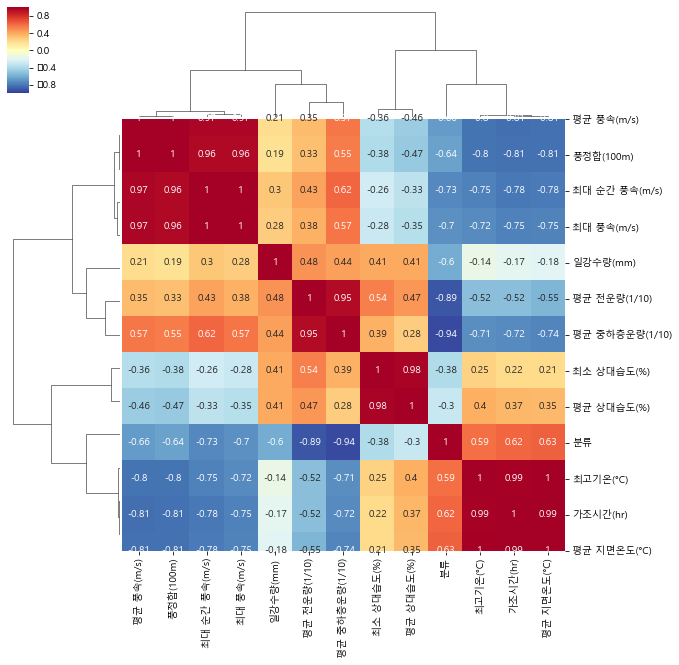

In [46]:
import seaborn as sns
df =df.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


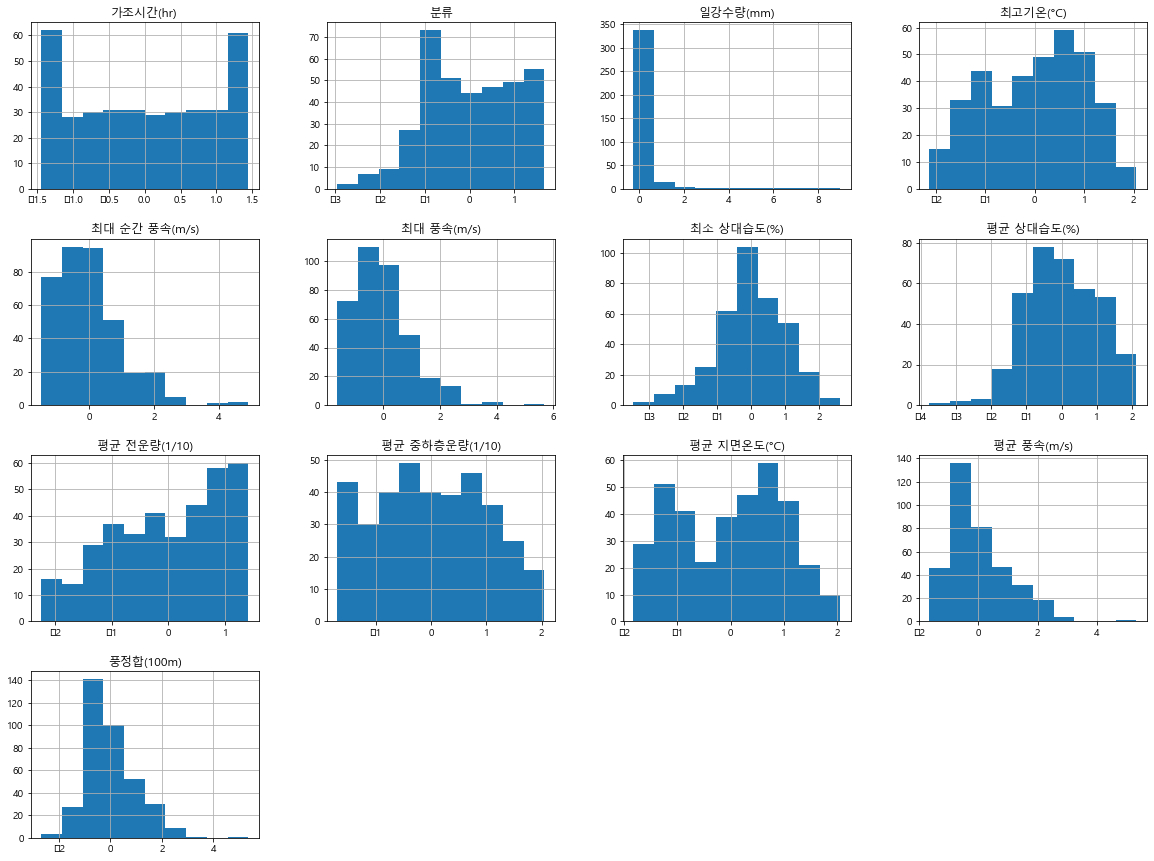

In [9]:
# standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.fit_transform(X)
df = pd.DataFrame(x_scaled, columns = X.columns)
df.hist( figsize = (20 , 15))
plt.show()

In [10]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
df.columns

Index(['최고기온(°C)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 풍속(m/s)', '평균 풍속(m/s)',
       '풍정합(100m)', '최소 상대습도(%)', '평균 상대습도(%)', '가조시간(hr)', '평균 전운량(1/10)',
       '평균 중하층운량(1/10)', '평균 지면온도(°C)', '분류'],
      dtype='object')

In [104]:
lm = sm.OLS(df['분류'],df[['최고기온(°C)', '일강수량(mm)','최대 순간 풍속(m/s)', '최대 풍속(m/s)', '평균 풍속(m/s)',
       '풍정합(100m)', '최소 상대습도(%)', '평균 상대습도(%)', '가조시간(hr)', '평균 전운량(1/10)',
       '평균 중하층운량(1/10)', '평균 지면온도(°C)']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     분류   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              536.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                   7.76e-218
Time:                        10:56:05   Log-Likelihood:                         -1517.8
No. Observations:                 364   AIC:                                      3060.
Df Residuals:                     352   BIC:                                      3106.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
최고기온(°C)           0.1745      0.399      0.437      0.662      -0.611       0.960
일강수량(mm)          -0.1507      0.046     -3.270      0.001      -0.241      -0.060
최대 순간 풍속(m/s)     -0.1854      0.812     -0.228      0.819      -1.782       1.411
최대 풍속(m/s)        -0.4209      1.581     -0.266      0.790      -3.531       2.689
평균 풍속(m/s)        -1.9011      2.437     -0.780      0.436      -6.694       2.892
풍정합(100m)       1.972e-05   2.27e-05      0.868      0.386   -2.49e-05    6.44e-05
최소 상대습도(%)         0.0297      0.125      0.237      0.813      -0.217       0.276
평균 상대습도(%)        -0.0442      0.156     -0.284      0.776      -0.350       0.262
가조시간(hr)           9.1609      0.649     14.116      0.000       7.885      10.437
평균 전운량(1/10)      -2.1170      0.608     -3.479      0.001      -3.314      -0.920
평균 중하층운량(1/10)    -1.6501      0.755     -2.186      0.029      -3.134      -0.166
평균 지면온도(°C)       -1.1662      0.373     -3.128      0.002      -1.900      -0.433
==============================================================================
Omnibus:                       21.404   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.492
Skew:                          -0.591   Prob(JB):                     7.92e-06
Kurtosis:                       3.390   Cond. No.                     8.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
lm = sm.OLS(df['분류'],df[['일강수량(mm)','가조시간(hr)','평균 전운량(1/10)',
                      '평균 중하층운량(1/10)', '가조시간(hr)','평균 지면온도(°C)' ]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     분류   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              46.37
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                    6.53e-37
Time:                        12:36:18   Log-Likelihood:                         -425.81
No. Observations:                 364   AIC:                                      861.6
Df Residuals:                     359   BIC:                                      881.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
일강수량(mm)          -0.1522      0.044     -3.446      0.001      -0.239      -0.065
가조시간(hr)           0.1675      0.049      3.385      0.001       0.070       0.265
평균 전운량(1/10)      -0.2176      0.079     -2.761      0.006      -0.373      -0.063
평균 중하층운량(1/10)    -0.3199      0.080     -4.003      0.000      -0.477      -0.163
가조시간(hr)           0.1675      0.049      3.385      0.001       0.070       0.265
평균 지면온도(°C)       -0.1309      0.097     -1.345      0.180      -0.322       0.061
==============================================================================
Omnibus:                       29.657   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.490
Skew:                          -0.728   Prob(JB):                     3.24e-08
Kurtosis:                       3.391   Cond. No.                     2.05e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
df.data = df[['일강수량(mm)','가조시간(hr)','평균 전운량(1/10)',
                      '평균 중하층운량(1/10)','평균 지면온도(°C)' ]]
df.target = df[["분류"]]

C:\Users\ICT01_23\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\ICT01_23\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df.data.corr()

,일강수량(mm),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C)
일강수량(mm),1.000000,0.173523,0.304290,0.255761,0.131605
가조시간(hr),0.173523,1.000000,-0.019257,-0.237865,0.899129
평균 전운량(1/10),0.304290,-0.019257,1.000000,0.826562,-0.129851
평균 중하층운량(1/10),0.255761,-0.237865,0.826562,1.000000,-0.298676
평균 지면온도(°C),0.131605,0.899129,-0.129851,-0.298676,1.000000


In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
model_df = LinearRegression().fit(df.data, df.target)



In [15]:
print(model_df.coef_)
print(model_df.intercept_)

[[-0.15220358  0.33500884 -0.21758596 -0.31990568 -0.13088768]]
[3.56515476e-16]


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, train_size=0.8, test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin = lin.fit(x_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(lin.score(x_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(lin.score(x_test, y_test)))

훈련 세트 점수 : 0.417
테스트 세트 점수 : 0.297


In [55]:
import seaborn as sns

sns.lmplot(x="size", y="price", data=df, line_kws={'color':"red"}

#sns.scatterplot(data = df, x ='x' , y ='y')
#
#sns.scatterplot(x = 'weather', y = 'y', data = data, hue = 'sex')

#sns.lmplot(x="df.data", y="df.target", data=df, line_kws={'color':"red"})


SyntaxError: unexpected EOF while parsing (<ipython-input-55-7d48257fcd8b>, line 9)

In [132]:
from sklearn.metrics import mean_squared_error
x_train_pre = lin.predict(x_train)
lin_pre = lin.predict(x_train)
lin_mse = mean_squared_error(y_train,x_train_pre)
lin_rmse = np.sqrt(lin_mse)
print("mse",lin_mse)
print("rmse",lin_rmse)

mse 228.15260302796713
rmse 15.10472121649278


In [36]:
#1.모델불러오기 및 정의하기
from sklearn.tree import DecisionTreeRegressor
dt_regr=DecisionTreeRegressor(max_depth=5)

In [37]:
#2.모델학습하기(훈련데이터)
dt_regr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
#3.결과 예측하기(테스트데이터)
y_pred=dt_regr.predict(x_test)

In [39]:
#4.결과 살펴보기
#일반적으로 선형회귀R2(제곱)을 평가척도로 사용 1에 가까울수록 모델일 데이터를 잘 표현한다는 

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import r2_score
print('다중결정트리, R2:{:.4f}'.format(r2_score(y_test,y_pred)))


다중결정트리, R2:0.7549


In [ ]:
#pca 

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin, x_train_pre, y_train,
                        scoring ="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)

NameError: name 'x_train_pre' is not defined

In [136]:
def display_scores(score):
    print(scores)
    print(scores.mean())
    print(score.std())
display_scores(lin_rmse_scores)

[-162.89458089 -305.62036584 -383.317965   -239.91461759 -118.17236333
 -236.11510059 -149.60253496 -336.75300157 -236.40618074 -162.32876769]
-233.11254781999682
2.714487617605146


In [ ]:
pip install Line